# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2024년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [1]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 6.24 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.bashrc.biolab
tar: ./root/.bashrc.biolab: Cannot open: Permission denied
./root/.bin.priority/
tar: ./root/.bin.priority: Cannot mkdir: Permission denied
./root/.bin.priority/pip
tar: ./root/.bin.priority/pip: Cannot open: Permission denied
./root/.bin.priority/pip2
tar: ./root/.bin.priority/pip2: Cannot open: Permission denied
./root/.bin.priority/pip3
tar: ./root/.bin.priority/pip3: Cannot open: Permission denied
./root/.condarc
tar: ./root/.condarc: Cannot open: Permission denied
./root/.profile
tar: ./root/.profile: Cannot open: Permission denied
./root/.tmux.conf
tar: ./root/.tmux.conf: Cannot open: Permission denied
./root/.vimrc
tar: 

/bin/bash: line 2: /root/conda/bin/conda: Permission denied

CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




Activated conda environment `lab'!


Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [3]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /rna/junyoung/prj/class -xf -

--2024-05-08 19:07:43--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6424668160 (6.0G) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>]   5.98G  84.9MB/s    in 61s     

2024-05-08 19:08:44 (101 MB/s) - written to stdout [6424668160/6424668160]



그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [5]:
!wget --no-check-certificate -O /rna/junyoung/prj/class/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

--2024-05-08 19:09:14--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28359457 (27M) [application/x-gzip]
Saving to: ‘/rna/junyoung/prj/class/binfo1-datapack1/gencode.gtf.gz’

/rna/junyoung/prj/c 100%[===================>]  27.04M   178KB/s    in 3m 8s   

2024-05-08 19:12:23 (147 KB/s) - ‘/rna/junyoung/prj/class/binfo1-datapack1/gencode.gtf.gz’ saved [28359457/28359457]



### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요. (나중에 자동으로 비교하고 싶으시면 `md5sum -c` 옵션을 사용하면 됩니다. 여기서는 MD5를 처음 써 보는 의미에서 직접 비교해 봅시다.)

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [7]:
!md5sum /rna/junyoung/prj/class/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /rna/junyoung/prj/class/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /rna/junyoung/prj/class/binfo1-datapack1/CLIP-35L33G.bam.bai
794eb8d273987a094dcc013afa2a1956  /rna/junyoung/prj/class/binfo1-datapack1/gencode.gtf.gz
328883a73d507eafbf5b60bd6b906201  /rna/junyoung/prj/class/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /rna/junyoung/prj/class/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /rna/junyoung/prj/class/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  /rna/junyoung/prj/class/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  /rna/junyoung/prj/class/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  /rna/junyoung/prj/class/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  /rna/junyoung/prj/class/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  /rna/junyoung/prj/class/binfo1-datapack1/R

In [9]:
!ls -al /rna/junyoung/prj/class/binfo*

total 6301792
drwxr-xr-x 1 junyoung rna        428 May  8 19:09 .
drwxrwxrwx 1 junyoung rna        122 May  8 19:07 ..
-rw-r--r-- 1 junyoung rna 1370036258 May  6  2021 CLIP-35L33G.bam
-rw-r--r-- 1 junyoung rna    3118336 May  6  2021 CLIP-35L33G.bam.bai
-rw-r--r-- 1 junyoung rna   28359457 Mar  9  2021 gencode.gtf.gz
-rw-r--r-- 1 junyoung rna 1003658801 May  6  2021 RNA-control.bam
-rw-r--r-- 1 junyoung rna    2276104 May  6  2021 RNA-control.bam.bai
-rw-r--r-- 1 junyoung rna 1260991122 May  6  2021 RNA-siLin28a.bam
-rw-r--r-- 1 junyoung rna    2710744 May  6  2021 RNA-siLin28a.bam.bai
-rw-r--r-- 1 junyoung rna  981684502 May  6  2021 RNA-siLuc.bam
-rw-r--r-- 1 junyoung rna    2606104 May  6  2021 RNA-siLuc.bam.bai
-rw-r--r-- 1 junyoung rna  737352902 May  6  2021 RPF-siLin28a.bam
-rw-r--r-- 1 junyoung rna    2482768 May  6  2021 RPF-siLin28a.bam.bai
-rw-r--r-- 1 junyoung rna 1055123479 May  6  2021 RPF-siLuc.bam
-rw-r--r-- 1 junyoung rna    2605912 May  6  2021 RPF-siLuc.bam.bai


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [10]:
!mamba install -y subread -c bioconda


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['subread']

warning  libmamba Cache file "/rna/junyoung/conda/pkgs/cache/497deca9.json" was modifie

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다.

먼저 작업 디렉토리를 만들고 데이터를 원본 디렉토리에서 복사해 옵니다. (이미 이 노트북을 실행한 적이 있으면 다시 할 필요는 없습니다.)

In [12]:
!mkdir /rna/junyoung/prj/class/binfo1-work
!rsync -Pav /rna/junyoung/prj/class/binfo1-datapack1/ /rna/junyoung/prj/class/binfo1-work/

mkdir: cannot create directory ‘/rna/junyoung/prj/class/binfo1-work’: File exists
sending incremental file list
./
CLIP-35L33G.bam
  1,370,036,258 100%    1.42GB/s    0:00:00 (xfr#1, to-chk=12/14)
CLIP-35L33G.bam.bai
      3,118,336 100%    1.37MB/s    0:00:02 (xfr#2, to-chk=11/14)
RNA-control.bam
  1,003,658,801 100%    1.46GB/s    0:00:00 (xfr#3, to-chk=10/14)
RNA-control.bam.bai
      2,276,104 100%    1.38MB/s    0:00:01 (xfr#4, to-chk=9/14)
RNA-siLin28a.bam
  1,260,991,122 100%    1.12GB/s    0:00:01 (xfr#5, to-chk=8/14)
RNA-siLin28a.bam.bai
      2,710,744 100%    2.10MB/s    0:00:01 (xfr#6, to-chk=7/14)
RNA-siLuc.bam
    981,684,502 100%  952.40MB/s    0:00:00 (xfr#7, to-chk=6/14)
RNA-siLuc.bam.bai
      2,606,104 100%    1.32MB/s    0:00:01 (xfr#8, to-chk=5/14)
RPF-siLin28a.bam
    737,352,902 100%  951.55MB/s    0:00:00 (xfr#9, to-chk=4/14)
RPF-siLin28a.bam.bai
      2,482,768 100%    1.67MB/s    0:00:01 (xfr#10, to-chk=3/14)
RPF-siLuc.bam
  1,055,123,479 100%  936.04MB/s    0

In [18]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


자! bam 파일에 담긴 aligned reads와 gtf 파일에 담긴 gene annotation으로 gene별 read count를 구합니다.

In [19]:
!gunzip gencode.gtf.gz

In [20]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           RNA-control.bam                                  ||
||                           RNA-siLin28a.bam                    

결과를 pandas로 읽어와 봅니다.

In [21]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [22]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/rna/junyoung/conda/envs/baek/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


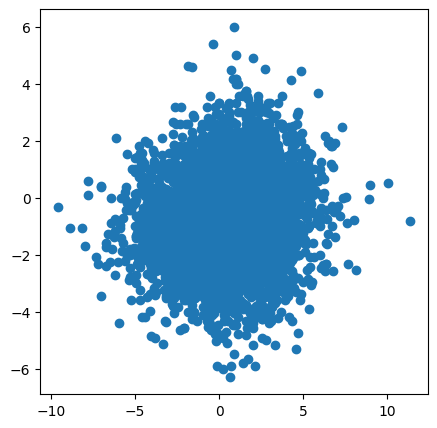

In [23]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

이 그림에는 문제가 많이 있습니다. 논문의 그림 Figure 4D처럼 한 번 만들어 봅시다~

In [30]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
len(cnts)

55359

In [192]:
readcounts = 30
cnts_sorted = cnts.loc[(cnts['CLIP-35L33G.bam'] > readcounts) &
                (cnts['RNA-control.bam'] > readcounts) &
                (cnts['RNA-siLin28a.bam'] > readcounts) &
                (cnts['RNA-siLuc.bam'] > readcounts) &
                (cnts['RPF-siLin28a.bam'] > readcounts) &
                (cnts['RPF-siLuc.bam'] > readcounts)] 
cnts_sorted.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128


In [193]:
cnt_clip_tpm = (cnts_sorted['CLIP-35L33G.bam'])/(sum(((cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_ctrl_tpm = (cnts_sorted['RNA-control.bam'])/(sum(((cnts_sorted['RNA-control.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RPF_siLin28a_tpm = (cnts_sorted['RPF-siLin28a.bam'])/(sum(((cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_siLin28a_tpm = (cnts_sorted['RNA-siLin28a.bam'])/(sum(((cnts_sorted['RNA-siLin28a.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RPF_siLuc_tpm = (cnts_sorted['RPF-siLuc.bam'])/(sum(((cnts_sorted['RPF-siLuc.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_siLuc_tpm = (cnts_sorted['RNA-siLuc.bam'])/(sum(((cnts_sorted['RNA-siLuc.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))

In [203]:
cnts_sorted['clip_enrichment'] = cnt_clip_tpm/cnt_RNA_ctrl_tpm
cnts_sorted['rden_change'] = (cnt_RPF_siLin28a_tpm/cnt_RNA_siLin28a_tpm)/(cnt_RPF_siLuc_tpm/cnt_RNA_siLuc_tpm)
cnts_sorted

/tmp/ipykernel_2062615/4011647431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['clip_enrichment'] = cnt_clip_tpm/cnt_RNA_ctrl_tpm
/tmp/ipykernel_2062615/4011647431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['rden_change'] = (cnt_RPF_siLin28a_tpm/cnt_RNA_siLin28a_tpm)/(cnt_RPF_siLuc_tpm/cnt_RNA_siLuc_tpm)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,0.709446,0.887728,ENSMUSG00000103922
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,1.091013,0.728419,ENSMUSG00000033845
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,1.312119,1.121116,ENSMUSG00000025903
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,0.801349,0.829434,ENSMUSG00000033813
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,0.863232,0.644868,ENSMUSG00000033793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,533,16638,50576,39430,21253,17355,0.011798,1.407514,ENSMUSG00000064351
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.063894,1.632190,ENSMUSG00000064363
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.255593,1.862398,ENSMUSG00000064367


(-6.0, 4.0)

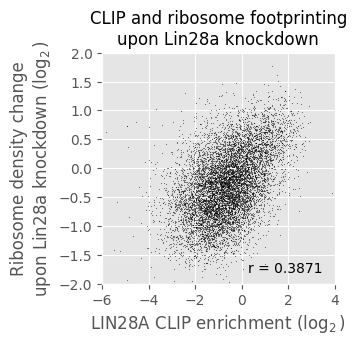

In [202]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(np.log2(cnts_sorted['clip_enrichment']),
           np.log2(cnts_sorted['rden_change']), alpha = 0.5, color='black', s=0.1)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_title('CLIP and ribosome footprinting\nupon Lin28a knockdown', fontsize = 12)
corr = stats.pearsonr(cnts_sorted['clip_enrichment'],cnts_sorted['rden_change'])
ax.annotate(f'r = {corr[0]:.4f}', xy=(0.95, 0.05), xycoords='axes fraction', ha='right')
ax.set_ylim(-2,2)
ax.set_xlim(-6,4)

## Protein localization 반영하기

논문 그림(Figure 5B, S6A)에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [82]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [196]:
cnts_sorted['gene_id'] = cnts_sorted.index.str.split('.').str[0].copy()
cnts_sorted


/tmp/ipykernel_2062615/2449409506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['gene_id'] = cnts_sorted.index.str.split('.').str[0].copy()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,0.709446,0.887728,ENSMUSG00000103922
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,1.091013,0.728419,ENSMUSG00000033845
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,1.312119,1.121116,ENSMUSG00000025903
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,0.801349,0.829434,ENSMUSG00000033813
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,0.863232,0.644868,ENSMUSG00000033793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,533,16638,50576,39430,21253,17355,0.011798,1.407514,ENSMUSG00000064351
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.063894,1.632190,ENSMUSG00000064363
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.255593,1.862398,ENSMUSG00000064367


In [201]:
cnts_merge = pd.merge(cnts_sorted, mouselocal)
print(cnts_merge.head(),len(cnts_merge))

                                                 Chr  \
0  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
2  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
3  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
4  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                               Start  \
0  4878011;4878046;4878053;4878119;4878121;487813...   
1  6276421;6276451;6284869;6284887;6285232;629382...   
2  7159144;7159154;7159328;7159390;7190418;721786...   
3  10094826;10095068;10097328;10097328;10097423;1...   
4  10108212;10108231;10108442;10108451;10108474;1...   

                                                 End  \
0  4878205;4878205;4878205;4878205;4878205;487820...   
1  6276494;6276494;6285181;6285181;6285476;629396...   
2  7159440;7159440;7159440;7159440;7190839;721796...   
3  10095288;10095288;10097476;10097476;10097476;1...   
4  10109567;10108355;10108569;10108569;1010856

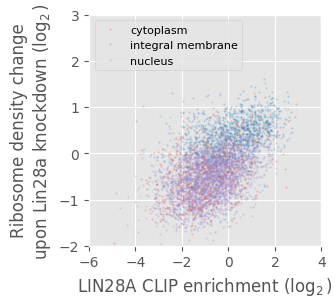

In [206]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

groups = cnts_merge.groupby('type')
for name, group in groups:
    ax.plot(np.log2(group.clip_enrichment),
            np.log2(group.rden_change),
            marker='.',
            linestyle='',
            label=name,
            alpha=0.3,
            markersize=1
            )
ax.legend(fontsize='8', loc='upper left')
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_ylim(-2,3)
ax.set_xlim(-6,4)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
None